In [1]:
import pandas as pd
import seaborn as sns
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Irfan\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [2]:
import os
print(os.listdir(r"C:\Users\Irfan\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3"))

['creditcard.csv']


In the above 2 cells I'm simply important the data using kagglehub

In [3]:
df = pd.read_csv(r"C:\Users\Irfan\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<Axes: xlabel='Class'>

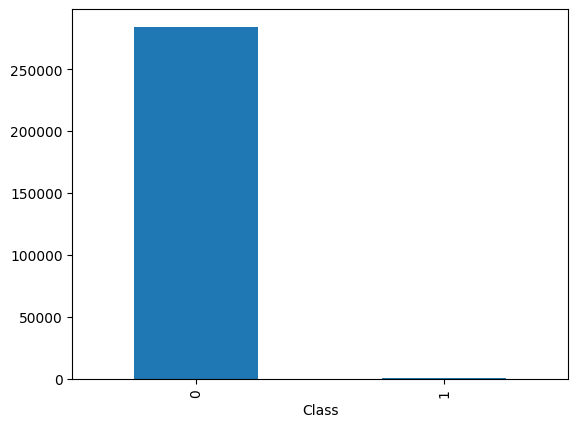

In [4]:
fraud_counts = df["Class"].value_counts()
fraud_counts.plot(kind = 'bar')


In [5]:
df.isna().any().any()

False

The below codecell splits the data up and prints out the shape which will be important as mistakes in training data are severe so having something to look back to

In [6]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=["Class"])  
t = df["Class"] 
X_train, X_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=0, stratify = t)
print(X_train.shape)
print(X_test.shape)
print(t_train.shape)
print(t_test.shape)


(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(random_state=0, max_iter= 100000)


LogisticRegression(max_iter=100000, random_state=0)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
logisticReg.fit(X_train, t_train)
train_score = logisticReg.score(X_train, t_train)

test_score = logisticReg.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.9992143781957032
Test Score: 0.9992099996488887


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.63      0.73        98

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



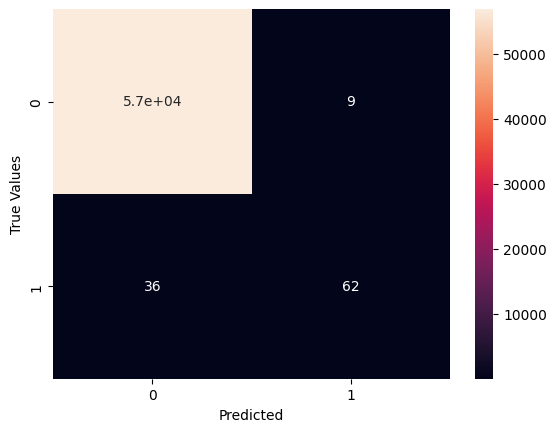

In [9]:
import matplotlib.pyplot as plt

y_pred = logisticReg.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [10]:
import xgboost as xgb
extremeGradientBoost = xgb.XGBClassifier()
extremeGradientBoost.fit(X_train, t_train)
train_score = extremeGradientBoost.score(X_train, t_train)

test_score = extremeGradientBoost.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 1.0
Test Score: 0.999403110845827


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.71      0.80        98

    accuracy                           1.00     56962
   macro avg       0.96      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



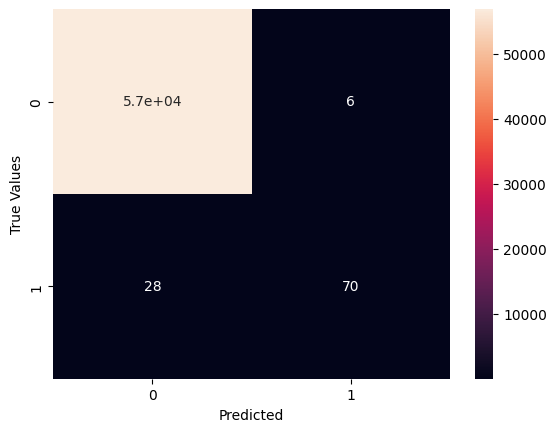

In [11]:
import matplotlib.pyplot as plt

y_pred = extremeGradientBoost.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [12]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(X_train, t_train)
train_score = svm.score(X_train, t_train)

test_score = svm.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.9982707542408216
Test Score: 0.9982795547909132


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

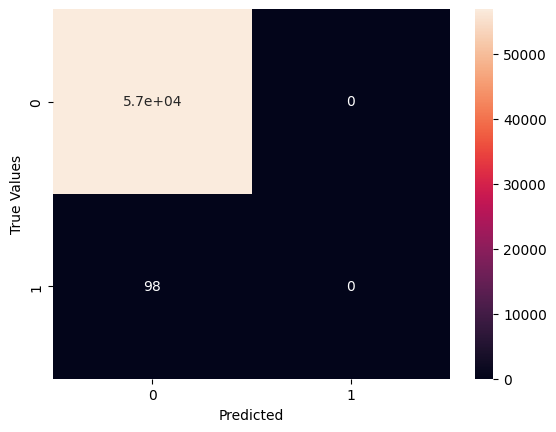

In [13]:
y_pred = svm.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, t_train)
train_score = rf.score(X_train, t_train)

test_score = rf.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 1.0
Test Score: 0.9994557775359011


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.71      0.82        98

    accuracy                           1.00     56962
   macro avg       0.98      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



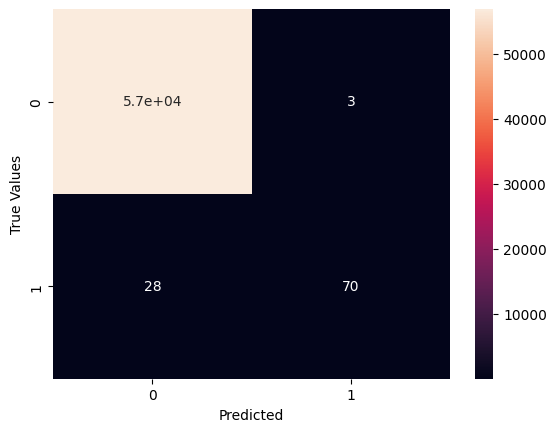

In [15]:
y_pred = rf.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, t_train)
train_score = mlp.score(X_train, t_train)

test_score = mlp.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.9983321995216046
Test Score: 0.9983673326077034


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.45      0.49        98

    accuracy                           1.00     56962
   macro avg       0.76      0.72      0.74     56962
weighted avg       1.00      1.00      1.00     56962



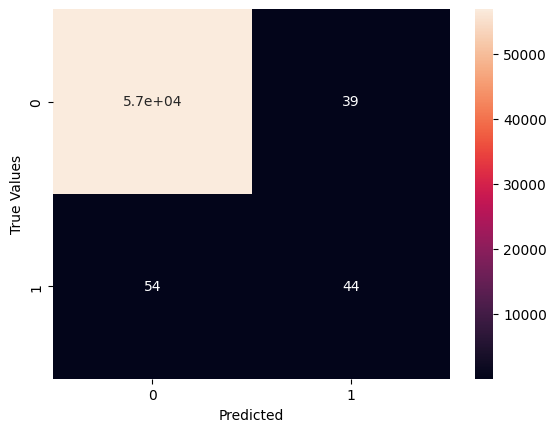

In [17]:
y_pred = mlp.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy= 0.5, random_state= 0)
X_trainSmote, T_trainSmote = smote.fit_resample(X_train, t_train)

logWithSmote = LogisticRegression(max_iter=100000, random_state= 0)
logWithSmote.fit(X_trainSmote, T_trainSmote)

train_score = logWithSmote.score(X_trainSmote, T_trainSmote)  
test_score = logWithSmote.score(X_test, t_test) 

print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.9839701503036556
Test Score: 0.9941188862750606


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.87      0.34        98

    accuracy                           0.99     56962
   macro avg       0.60      0.93      0.67     56962
weighted avg       1.00      0.99      1.00     56962



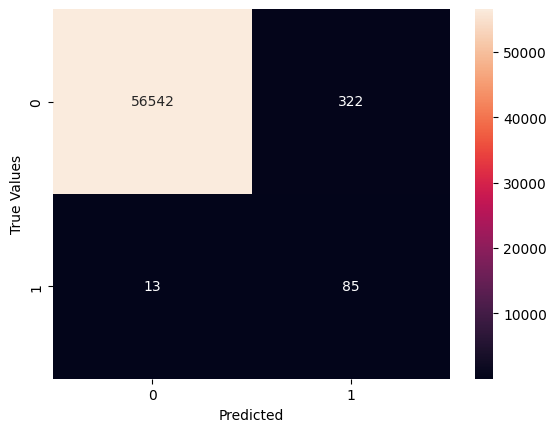

In [19]:
import matplotlib.pyplot as plt
y_pred_smote = logWithSmote.predict(X_test)
print(classification_report(t_test, y_pred_smote))
cm = confusion_matrix(t_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.999403110845827
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



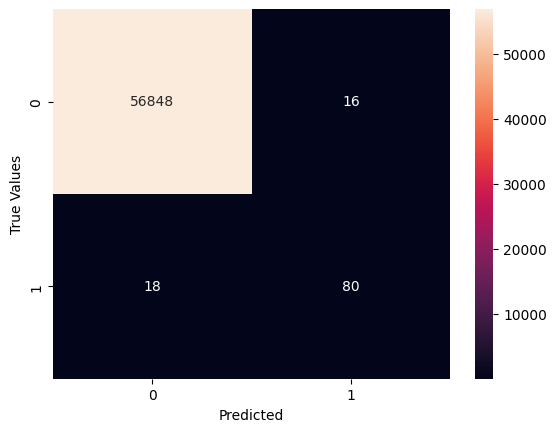

In [20]:
import xgboost as xgb
extremeGradientBoost = xgb.XGBClassifier()
extremeGradientBoost.fit(X_trainSmote, T_trainSmote)
train_score = extremeGradientBoost.score(X_trainSmote, T_trainSmote)

test_score = extremeGradientBoost.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
import matplotlib.pyplot as plt

y_pred = extremeGradientBoost.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 1.0
Test Score: 0.9995259997893332
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.80      0.85        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



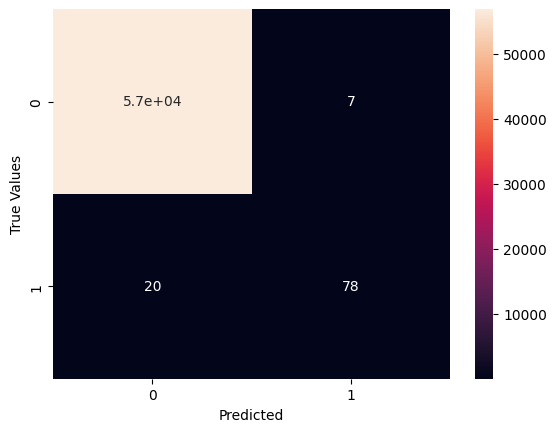

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_trainSmote, T_trainSmote)
train_score = rf.score(X_trainSmote, T_trainSmote)

test_score = rf.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = rf.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

Train Score: 0.9804118695336131
Test Score: 0.9972437765527896
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.82      0.50        98

    accuracy                           1.00     56962
   macro avg       0.68      0.91      0.75     56962
weighted avg       1.00      1.00      1.00     56962



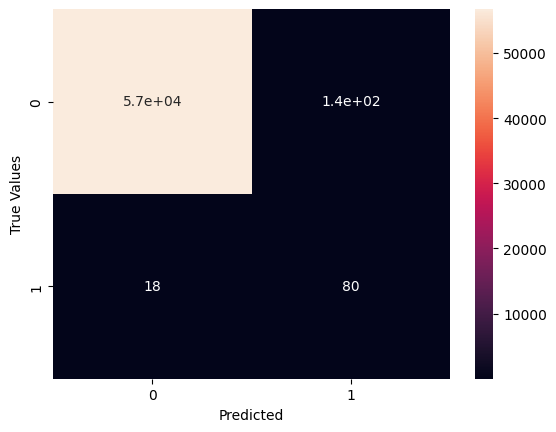

In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(X_trainSmote, T_trainSmote)
train_score = mlp.score(X_trainSmote, T_trainSmote)

test_score = mlp.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))
y_pred = mlp.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb
extremeGradientBoost = xgb.XGBClassifier(random_state = 0)
kf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 0)
hyper_parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0, 1, 10],
    'reg_alpha': [0, 1, 10],
}
gridSearch = GridSearchCV(extremeGradientBoost, hyper_parameters, cv = kf)
gridSearch.fit(X_train,t_train)
print("Best params : ", gridSearch.best_params_)

In [ ]:
import xgboost as xgb

extremeGradientBoost = xgb.XGBClassifier(**gridSearch.best_params_, random_state = 0)
extremeGradientBoost.fit(X_train, t_train)
train_score = extremeGradientBoost.score(X_train, t_train)

test_score = extremeGradientBoost.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

In [ ]:
import matplotlib.pyplot as plt

y_pred = extremeGradientBoost.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(random_state=0, max_iter= 10000)
kf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 0)
hyper_parameters = {
    {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1'], 'solver': ['liblinear']},
    {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs']}
}
gridSearch = GridSearchCV(logisticReg, hyper_parameters, cv = kf)
gridSearch.fit(X_train, t_train)
print("Best params : ", gridSearch.best_params_)

c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Irfan\Desktop\Astro\Astro-AI-Chatbot\.conda\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Irfan\Desktop\Ast

Best params :  {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(random_state=0, max_iter= 10000, **gridSearch.best_params_)
logisticReg.fit(X_train, t_train)
train_score = logisticReg.score(X_train, t_train)

test_score = logisticReg.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

In [ ]:
import matplotlib.pyplot as plt

y_pred = logisticReg.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 0)
hyper_parameters = {
    'n_estimators': [50, 100, 200, 500],  
    'max_depth': [None, 5, 10, 20],       
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4],        
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False]            
}
rf = RandomForestClassifier(random_state=0)
gridSearch = GridSearchCV(rf, hyper_parameters, cv = kf)
gridSearch.fit(X_train, t_train)
print("Best params : ", gridSearch.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0, **gridSearch.best_params_)
train_score = rf.score(X_train, t_train)

test_score = rf.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

In [ ]:
y_pred = rf.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 0)
svm = SVC(random_state=0)
hyper_parameters = {
    'C': [0.01, 0.1, 1, 10, 100],   
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'degree': [2, 3, 4],  
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  
    'coef0': [0.0, 0.1, 0.5, 1.0],  
}
gridSearch = GridSearchCV(svm, hyper_parameters, cv = kf)
gridSearch.fit(X_train, t_train)
print("Best params : ", gridSearch.best_params_)

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 0, **gridSearch.best_params_)
train_score = svm.score(X_train, t_train)

test_score = svm.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

In [ ]:
y_pred = svm.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 0)
hyper_parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],  
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  
    'solver': ['lbfgs', 'sgd', 'adam'],  
    'alpha': [0.0001, 0.001, 0.01, 0.1], 
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  
    'max_iter': [200, 500, 1000],  
}
gridSearch = GridSearchCV(mlp, hyper_parameters, cv = kf)
gridSearch.fit(X_train, t_train)
print("Best params : ", gridSearch.best_params_)

In [ ]:
mlp = MLPClassifier(random_state=0, **gridSearch.best_params_)
mlp.fit(X_train, t_train)
train_score = mlp.score(X_train, t_train)

test_score = mlp.score(X_test, t_test)
print("Train Score: "+ str(train_score))
print("Test Score: " + str(test_score))

In [ ]:
y_pred = mlp.predict(X_test)
print(classification_report(t_test, y_pred))
cm = confusion_matrix(t_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.show()